In [11]:
using DrWatson
@quickactivate "Doran_etal_2022"

using CSV, DataFrames
using StatsPlots
using Statistics
using SPI
using NewickTreeTools

## SPI Tree

In [36]:
## Plot MI curves
plotdf = CSV.read(joinpath(datadir(), "exp_pro", "UP7047", "2022-05-23_MI-spitree_treedepth-by-taxa.csv"), DataFrame);
taxaranklabels = string.([:Phylum :Class :Order :Family :Genus :Species])
taxarankcolors = [:red :pink :orange :lightblue :green :aqua];

spi_tree = readnw(read(joinpath(projectdir(), "_research", "runSPIonUP7047rows", "2022-02-22_UP7047-supporttree.nw"), String));
as_polytomy!(spi_tree, fun=n->NewickTree.support(n)<0.5)
as_polytomy!(spi_tree, fun=n->NewickTree.distance(n)<1e-8)
minmax = extrema(mapinternalnodes(network_distance, spi_tree, spi_tree))
cuts = range(0, minmax[2], length=100)

0.0:16.19191919191919:1603.0

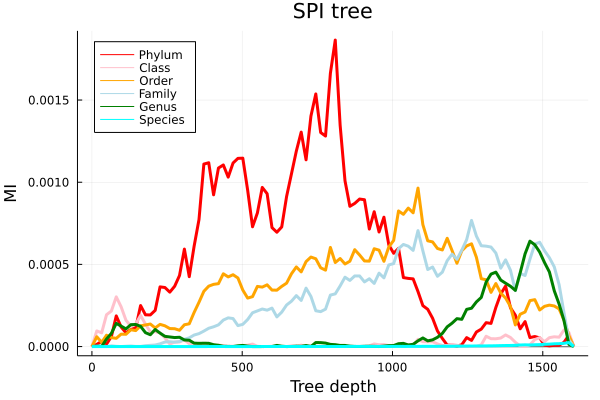

In [21]:

plot(title="SPI tree",ylabel="MI", xlabel="Tree depth", legend=:topleft)
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    perm_μ = mean(Matrix(df[!,3:end]), dims=2)[:]
    perm_σ = std(Matrix(df[!,3:end]), dims=2)[:]
    plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, :MI, label=tlab, c=tcol, lw=3)
end
plot!()

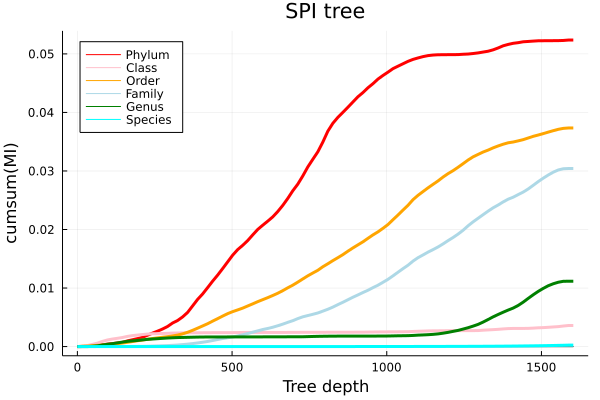

In [22]:

plot(title="SPI tree", ylabel="cumsum(MI)", xlabel="Tree depth", legend=:topleft)
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    perm_μ = Matrix(df[!,3:end]) |>
        m->cumsum(m, dims=1) |>
        m->mean(m, dims=2)[:]
    perm_σ = Matrix(df[!,3:end]) |>
        m->cumsum(m, dims=1) |>
        m->std(m, dims=2)[:]
    plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, cumsum(:MI), label=tlab, c=tcol, lw=3)
end
plot!()

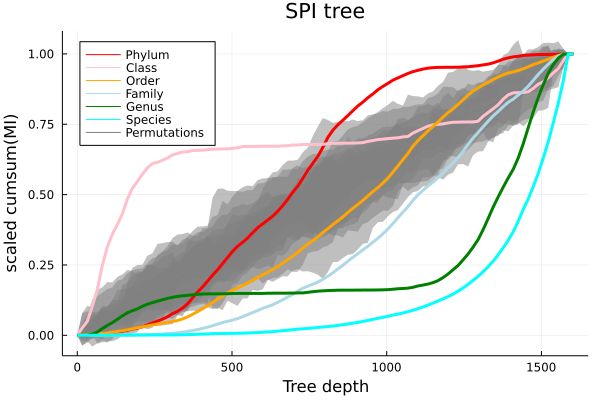

In [38]:

plot(title="SPI tree", ylabel="scaled cumsum(MI)", xlabel="Tree depth", legend=:topleft)
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    perm_μ = Matrix(df[!,3:end]) |>
        m->scaledcumsum(m, dims=1) |>
        m->mean(m, dims=2)[:]
    perm_σ = Matrix(df[!,3:end]) |>
        m->scaledcumsum(m, dims=1) |>
        m->std(m, dims=2)[:]
    plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, scaledcumsum(:MI), label=tlab, c=tcol, lw=3)
end
plot!([0,0], c=:grey, label="Permutations")

## OGG euclidean Tree

In [13]:
## Plot MI curves
plotdf = CSV.read(joinpath(datadir(), "exp_pro", "UP7047", "2022-05-23_MI-UP7047-ogg-euclidean_treedepth-by-taxa.csv"), DataFrame);
taxaranklabels = string.([:Phylum :Class :Order :Family :Genus :Species])
taxarankcolors = [:red :pink :orange :lightblue :green :aqua];

alt_tree = readnw(read(joinpath(projectdir(), "_research", "UP7047altdists", "UP7047_ogg_euclidean-supporttree.nw"), String));
as_polytomy!(alt_tree, fun=n->NewickTree.support(n)<0.5)
as_polytomy!(alt_tree, fun=n->NewickTree.distance(n)<1e-8)
minmax = extrema(mapinternalnodes(network_distance, alt_tree, alt_tree))
cuts = range(0, minmax[2], length=100)

0.0:2.5353535353535355:251.0

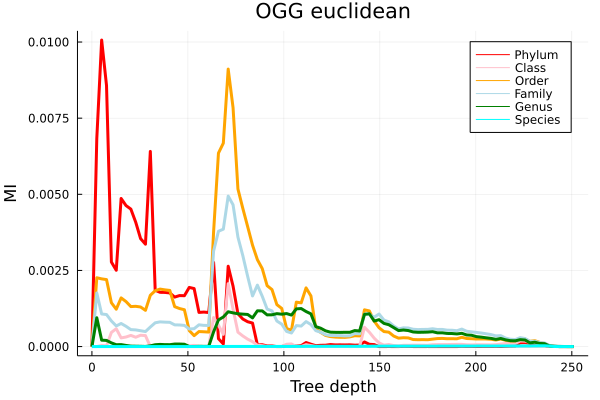

In [16]:

plot(title="OGG euclidean", ylabel="MI", xlabel="Tree depth", legend=:topright)
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    perm_μ = mean(Matrix(df[!,3:end]), dims=2)[:]
    perm_σ = std(Matrix(df[!,3:end]), dims=2)[:]
    plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, :MI, label=tlab, c=tcol, lw=3)
end
plot!()

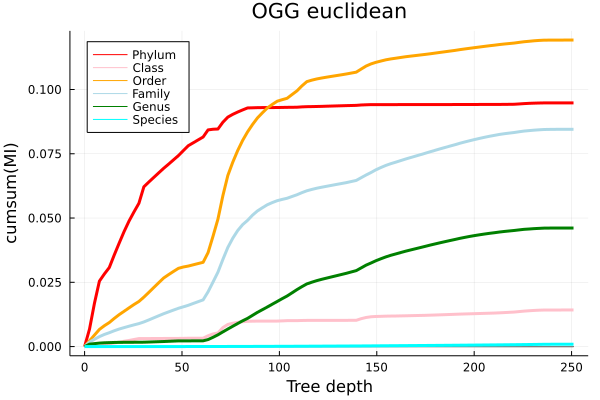

In [17]:

plot(title="OGG euclidean", ylabel="cumsum(MI)", xlabel="Tree depth", legend=:topleft)
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    perm_μ = Matrix(df[!,3:end]) |>
        m->cumsum(m, dims=1) |>
        m->mean(m, dims=2)[:]
    perm_σ = Matrix(df[!,3:end]) |>
        m->cumsum(m, dims=1) |>
        m->std(m, dims=2)[:]
    plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, cumsum(:MI), label=tlab, c=tcol, lw=3)
end
plot!()

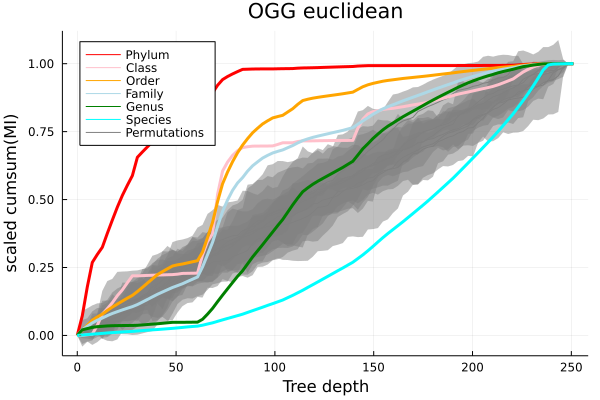

In [18]:

plot(title="OGG euclidean", ylabel="scaled cumsum(MI)", xlabel="Tree depth", legend=:topleft)
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    perm_μ = Matrix(df[!,3:end]) |>
        m->scaledcumsum(m, dims=1) |>
        m->mean(m, dims=2)[:]
    perm_σ = Matrix(df[!,3:end]) |>
        m->scaledcumsum(m, dims=1) |>
        m->std(m, dims=2)[:]
    plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, scaledcumsum(:MI), label=tlab, c=tcol, lw=3)
end
plot!([0,0], c=:grey, label="Permutations")

## OGG Cityblock Tree

In [24]:
## Plot MI curves
plotdf = CSV.read(joinpath(datadir(), "exp_pro", "UP7047", "2022-05-23_MI-UP7047-ogg-cityblock_treedepth-by-taxa.csv"), DataFrame);
taxaranklabels = string.([:Phylum :Class :Order :Family :Genus :Species])
taxarankcolors = [:red :pink :orange :lightblue :green :aqua];

alt_tree = readnw(read(joinpath(projectdir(), "_research", "UP7047altdists", "UP7047_ogg_cityblock-supporttree.nw"), String));
as_polytomy!(alt_tree, fun=n->NewickTree.support(n)<0.5)
as_polytomy!(alt_tree, fun=n->NewickTree.distance(n)<1e-8)
minmax = extrema(mapinternalnodes(network_distance, alt_tree, alt_tree))
cuts = range(0, minmax[2], length=100)

0.0:1.97979797979798:196.0

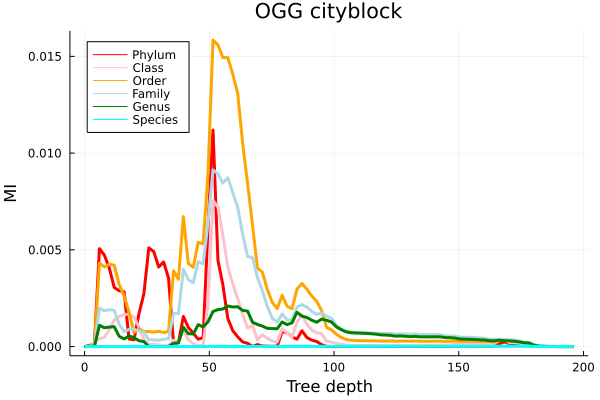

In [25]:

plot(title="OGG cityblock", ylabel="MI", xlabel="Tree depth", legend=:topleft)
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    perm_μ = mean(Matrix(df[!,3:end]), dims=2)[:]
    perm_σ = std(Matrix(df[!,3:end]), dims=2)[:]
    plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, :MI, label=tlab, c=tcol, lw=3)
end
plot!()

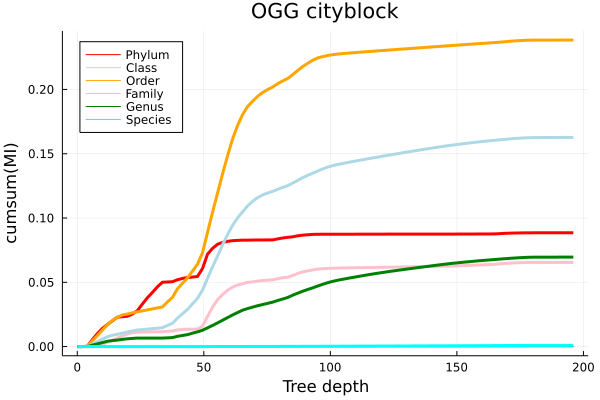

In [29]:

plot(title="OGG cityblock", ylabel="cumsum(MI)", xlabel="Tree depth", legend=:topleft)
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    perm_μ = Matrix(df[!,3:end]) |>
        m->cumsum(m, dims=1) |>
        m->mean(m, dims=2)[:]
    perm_σ = Matrix(df[!,3:end]) |>
        m->cumsum(m, dims=1) |>
        m->std(m, dims=2)[:]
    plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, cumsum(:MI), label=tlab, c=tcol, lw=3)
end
plot!()

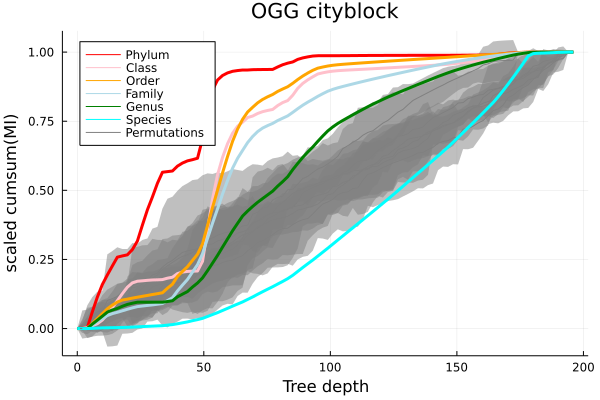

In [28]:

plot(title="OGG cityblock", ylabel="scaled cumsum(MI)", xlabel="Tree depth", legend=:topleft)
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    perm_μ = Matrix(df[!,3:end]) |>
        m->scaledcumsum(m, dims=1) |>
        m->mean(m, dims=2)[:]
    perm_σ = Matrix(df[!,3:end]) |>
        m->scaledcumsum(m, dims=1) |>
        m->std(m, dims=2)[:]
    plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, scaledcumsum(:MI), label=tlab, c=tcol, lw=3)
end
plot!([0,0], c=:grey, label="Permutations")

## Top 10 PCs Euclidean Tree

In [43]:
## Plot MI curves
plotdf = CSV.read(joinpath(datadir(), "exp_pro", "UP7047", "2022-05-23_MI-UP7047-svd-euclidean_treedepth-by-taxa.csv"), DataFrame);
taxaranklabels = string.([:Phylum :Class :Order :Family :Genus :Species])
taxarankcolors = [:red :pink :orange :lightblue :green :aqua];

alt_tree = readnw(read(joinpath(projectdir(), "_research", "UP7047altdists", "UP7047_svd_euclidean-supporttree.nw"), String));
as_polytomy!(alt_tree, fun=n->NewickTree.support(n)<0.5)
as_polytomy!(alt_tree, fun=n->NewickTree.distance(n)<1e-8)
minmax = extrema(mapinternalnodes(network_distance, alt_tree, alt_tree))
cuts = range(0, minmax[2], length=100)

0.0:0.6565656565656566:65.0

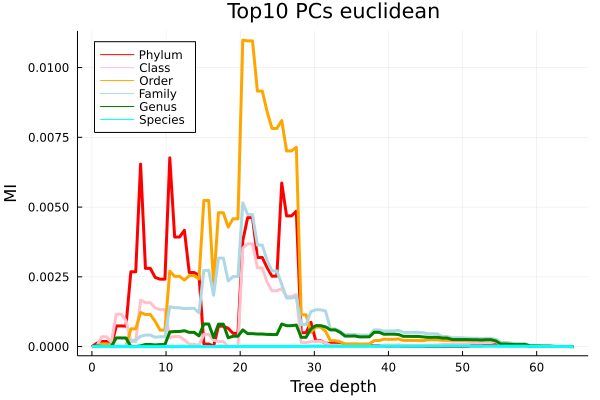

In [44]:

plot(title="Top10 PCs euclidean", ylabel="MI", xlabel="Tree depth", legend=:topleft)
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    perm_μ = mean(Matrix(df[!,3:end]), dims=2)[:]
    perm_σ = std(Matrix(df[!,3:end]), dims=2)[:]
    plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, :MI, label=tlab, c=tcol, lw=3)
end
plot!()

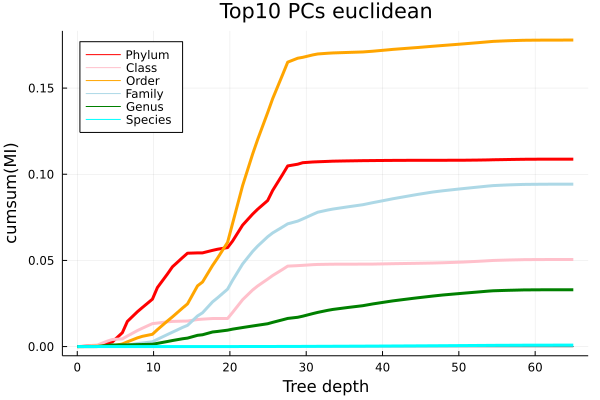

In [45]:

plot(title="Top10 PCs euclidean", ylabel="cumsum(MI)", xlabel="Tree depth", legend=:topleft)
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    perm_μ = Matrix(df[!,3:end]) |>
        m->cumsum(m, dims=1) |>
        m->mean(m, dims=2)[:]
    perm_σ = Matrix(df[!,3:end]) |>
        m->cumsum(m, dims=1) |>
        m->std(m, dims=2)[:]
    plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, cumsum(:MI), label=tlab, c=tcol, lw=3)
end
plot!()

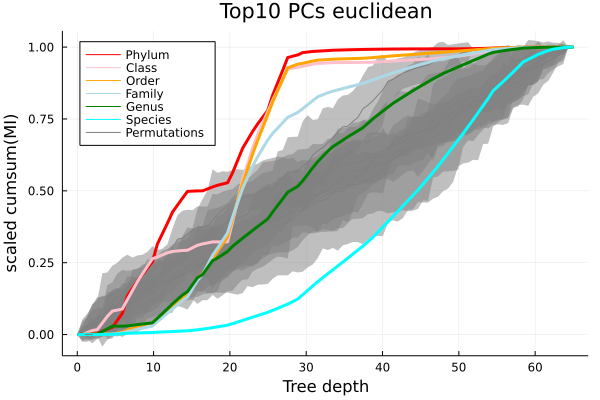

In [46]:

plot(title="Top10 PCs euclidean", ylabel="scaled cumsum(MI)", xlabel="Tree depth", legend=:topleft)
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    perm_μ = Matrix(df[!,3:end]) |>
        m->scaledcumsum(m, dims=1) |>
        m->mean(m, dims=2)[:]
    perm_σ = Matrix(df[!,3:end]) |>
        m->scaledcumsum(m, dims=1) |>
        m->std(m, dims=2)[:]
    plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, scaledcumsum(:MI), label=tlab, c=tcol, lw=3)
end
plot!([0,0], c=:grey, label="Permutations")

## Top 10 PCs Cityblock Tree

In [39]:
## Plot MI curves
plotdf = CSV.read(joinpath(datadir(), "exp_pro", "UP7047", "2022-05-23_MI-UP7047-svd-cityblock_treedepth-by-taxa.csv"), DataFrame);
taxaranklabels = string.([:Phylum :Class :Order :Family :Genus :Species])
taxarankcolors = [:red :pink :orange :lightblue :green :aqua];

alt_tree = readnw(read(joinpath(projectdir(), "_research", "UP7047altdists", "UP7047_svd_cityblock-supporttree.nw"), String));
as_polytomy!(alt_tree, fun=n->NewickTree.support(n)<0.5)
as_polytomy!(alt_tree, fun=n->NewickTree.distance(n)<1e-8)
minmax = extrema(mapinternalnodes(network_distance, alt_tree, alt_tree))
cuts = range(0, minmax[2], length=100)

0.0:0.5959595959595959:59.0

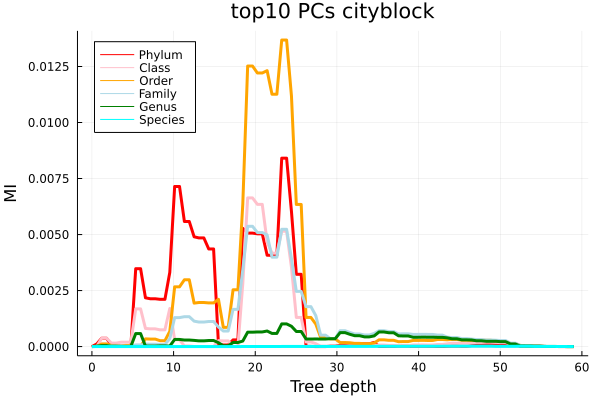

In [40]:

plot(title="top10 PCs cityblock", ylabel="MI", xlabel="Tree depth", legend=:topleft)
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    perm_μ = mean(Matrix(df[!,3:end]), dims=2)[:]
    perm_σ = std(Matrix(df[!,3:end]), dims=2)[:]
    plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, :MI, label=tlab, c=tcol, lw=3)
end
plot!()

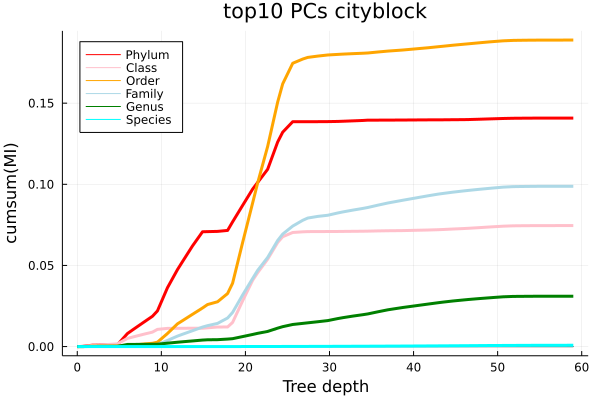

In [41]:

plot(title="top10 PCs cityblock", ylabel="cumsum(MI)", xlabel="Tree depth", legend=:topleft)
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    perm_μ = Matrix(df[!,3:end]) |>
        m->cumsum(m, dims=1) |>
        m->mean(m, dims=2)[:]
    perm_σ = Matrix(df[!,3:end]) |>
        m->cumsum(m, dims=1) |>
        m->std(m, dims=2)[:]
    plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, cumsum(:MI), label=tlab, c=tcol, lw=3)
end
plot!()

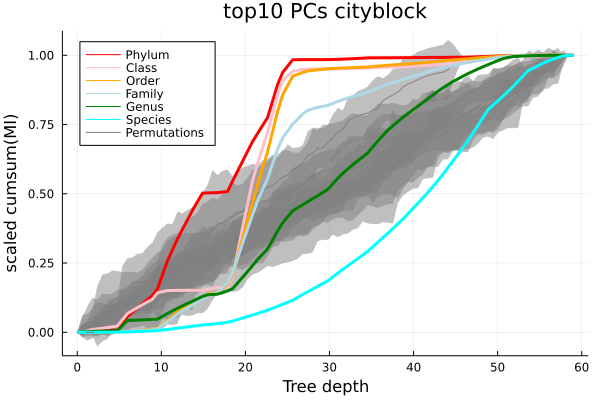

In [42]:

plot(title="top10 PCs cityblock", ylabel="scaled cumsum(MI)", xlabel="Tree depth", legend=:topleft)
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    perm_μ = Matrix(df[!,3:end]) |>
        m->scaledcumsum(m, dims=1) |>
        m->mean(m, dims=2)[:]
    perm_σ = Matrix(df[!,3:end]) |>
        m->scaledcumsum(m, dims=1) |>
        m->std(m, dims=2)[:]
    plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, scaledcumsum(:MI), label=tlab, c=tcol, lw=3)
end
plot!([0,0], c=:grey, label="Permutations")